In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.pyplot import grid

In [11]:
data=pd.read_csv(r'C:\Users\vikil\Desktop\ML\data_Sets\STOCKS\all_stocks_5yr.csv')
data1=data.groupby('Name')

In [24]:
data_aal=data1.get_group('AAL')

In [25]:
data_aal

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
1254,2018-02-01,54.00,54.64,53.59,53.88,3623078,AAL
1255,2018-02-02,53.49,53.99,52.03,52.10,5109361,AAL
1256,2018-02-05,51.99,52.39,49.75,49.76,6878284,AAL
1257,2018-02-06,49.32,51.50,48.79,51.18,6782480,AAL


In [46]:
data_aal_in=data_aal.iloc[:,1]


In [ ]:
data_aal_in=np.array(data_aal_in).reshape(-1,1)

In [51]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
aal_data=sc.fit_transform(data_aal_in)

In [63]:
train_in=[]
train_out=[]
for i in range(30,len(aal_data)):
    train_in.append(aal_data[i-30:i,0])
    train_out.append(aal_data[i,0])
    

In [81]:
train_in=np.array(train_in)
train_out=np.array(train_out)

In [99]:
from sklearn.model_selection import train_test_split
training,testing= train_test_split(train_in,test_size=0.2,random_state=0)
training_op,testing_op=train_test_split(train_out,test_size=0.2, random_state=0)

In [98]:
training=np.reshape(training,(training.shape[0], training.shape[1],1))

In [84]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [88]:
regressor=Sequential()
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(training.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

In [89]:
regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(training,training_op,epochs=100,batch_size=32)

Epoch 1/100
983/983 [==============================] - 9s 10ms/step - loss: 0.0560
Epoch 2/100
983/983 [==============================] - 4s 5ms/step - loss: 0.0092
Epoch 3/100
983/983 [==============================] - 4s 5ms/step - loss: 0.0078
Epoch 4/100
983/983 [==============================] - 5s 5ms/step - loss: 0.0078
Epoch 5/100
983/983 [==============================] - 4s 4ms/step - loss: 0.0061
Epoch 6/100
983/983 [==============================] - 4s 5ms/step - loss: 0.0064
Epoch 7/100
983/983 [==============================] - 4s 5ms/step - loss: 0.0066
Epoch 8/100
983/983 [==============================] - 4s 5ms/step - loss: 0.0063
Epoch 9/100
983/983 [==============================] - 4s 5ms/step - loss: 0.0057
Epoch 10/100
983/983 [==============================] - 5s 5ms/step - loss: 0.0061
Epoch 11/100
983/983 [==============================] - 4s 5ms/step - loss: 0.0060
Epoch 12/100
983/983 [==============================] - 5s 5ms/step - loss: 0.0059
Epoch 13/100

In [112]:
pred_stock=regressor.predict(testing)
pred_stock=sc.inverse_transform(pred_stock)
testing_op=sc.inverse_transform(testing_op.reshape(-1,1))

In [133]:
len(testing[0])

30

In [126]:
w=testing_op.reshape(1,-1)

In [131]:
#from sklearn.metrics import accuracy_score
#accuracy_score(q,w)

In [130]:
#from sklearn.metrics import confusion_matrix
#confusion_matrix(q,w)

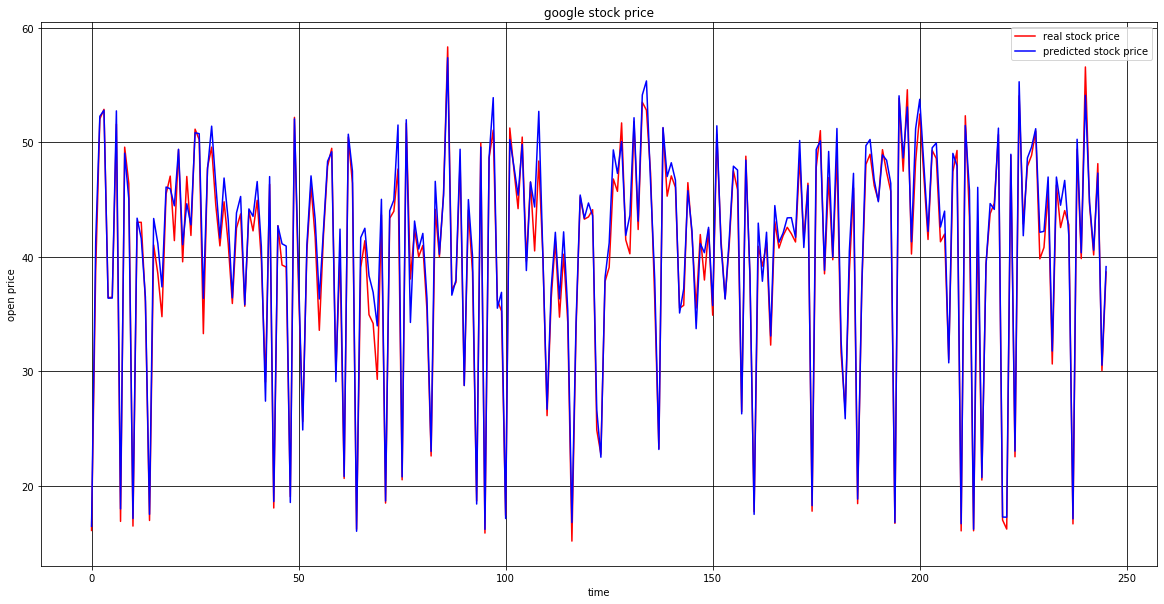

In [127]:
plt.figure(figsize=(20,10))
plt.plot(testing_op,color='red',label='real stock price')
plt.plot(pred_stock,color='blue',label='predicted stock price')
plt.title('google stock price')
plt.xlabel('time')
plt.ylabel('open price')
plt.legend()
plt.grid(True, color='k')
plt.show()